# Pokemon Challenges

Loading the two dataset from the server using **pandas**. Besides we've imported **numpy** and  **matplotlib** too. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pkm = pd.read_csv('https://bitbucket.org/daskell/task-b-pokemon/raw/3cbe9046f663a392b8fb071ddfdb3274ccdcff47/pokemon.csv')
battles = pd.read_csv('https://bitbucket.org/daskell/task-b-pokemon/raw/3cbe9046f663a392b8fb071ddfdb3274ccdcff47/combats.csv')


## Exploring the data

### 1) Explore the data and report some descriptive statistics 

Using *decribe* and *info* methods that are in pandas  to have an overview of the fields and their values distributions in the ***pokémon*** dataset.

In [2]:
print(pkm.info(),'\n\n',pkm.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
pid          800 non-null int64
Name         799 non-null object
Class 1      800 non-null object
Class 2      414 non-null object
HP           800 non-null int64
Attack       800 non-null int64
Defense      800 non-null int64
Sp. Atk      800 non-null int64
Sp. Def      800 non-null int64
Speed        800 non-null int64
Legendary    800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB
None 

             pid          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   

Only 414 pokemon have two types(Class 1 and Class 2 fields with values both) , the remainings have only one principal type(Class 1) with values. Besides there is a pokemon id that is missing, so we have to fill and correct.

In [177]:
pkm.count()

pid          800
Name         799
Class 1      800
Class 2      414
HP           800
Attack       800
Defense      800
Sp. Atk      800
Sp. Def      800
Speed        800
Legendary    800
dtype: int64

In [21]:
pkm[(pkm['Name'].isna())]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,False


The missing pokémon 'Name' is 'Primeape'. We can fill the field with pandas method **fillna()**

In [2]:
pkm['Name'] = pkm['Name'].fillna('Primeape')
pkm[pkm['Name']=='Primeape']

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,False


In [23]:
pkm.count()

pid          800
Name         800
Class 1      800
Class 2      414
HP           800
Attack       800
Defense      800
Sp. Atk      800
Sp. Def      800
Speed        800
Legendary    800
dtype: int64

Visualizing the correlation matrix of the numeric variables of the ***pokémon*** dataset. 

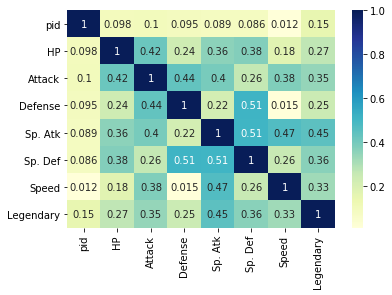

In [26]:
import seaborn as sb
#pkm1 = pd.get_dummies(pkm,columns = ['Class 1','Class 2'])
#corr = pkm1.corr()
sb.heatmap(pkm.corr(),annot = True, cmap ="YlGnBu")

There aren't strong values of correlations between the features,a little for the couples : (*Sp.Def*;*Def*) and (*Sp.Def* ; *Sp.Atk*).

Evaluting the number of pokémon for every value of the first and the second type.

In [191]:
print(pkm['Class 1'].value_counts(),'\n\n',pkm['Class 2'].value_counts())


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Class 1, dtype: int64 

 Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Class 2, dtype: int64


Creating a function that gives the number of pokémon with two types chosen arbitrarily.

In [55]:
def pkm_for_classes(class1,class2):
    di = dict(pkm[(pkm['Class 1'] == class1)&(pkm['Class 2'] == class2 )].count())
    return di['pid']
# for example :
print(pkm_for_classes('Water','Fighting'))


3

Encoding the boolean values of the *Legendary* field to visualize its historgram in the next paragraph.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pkm['Legendary'] = le.fit_transform(pkm['Legendary'].values)
pkm

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,0
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,0
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,0
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,0
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,0
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,0


### 2-3)  Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature-Visualize the relation between these two variables using an appropriate plot

Plotting the histrograms for every (numerical) features.

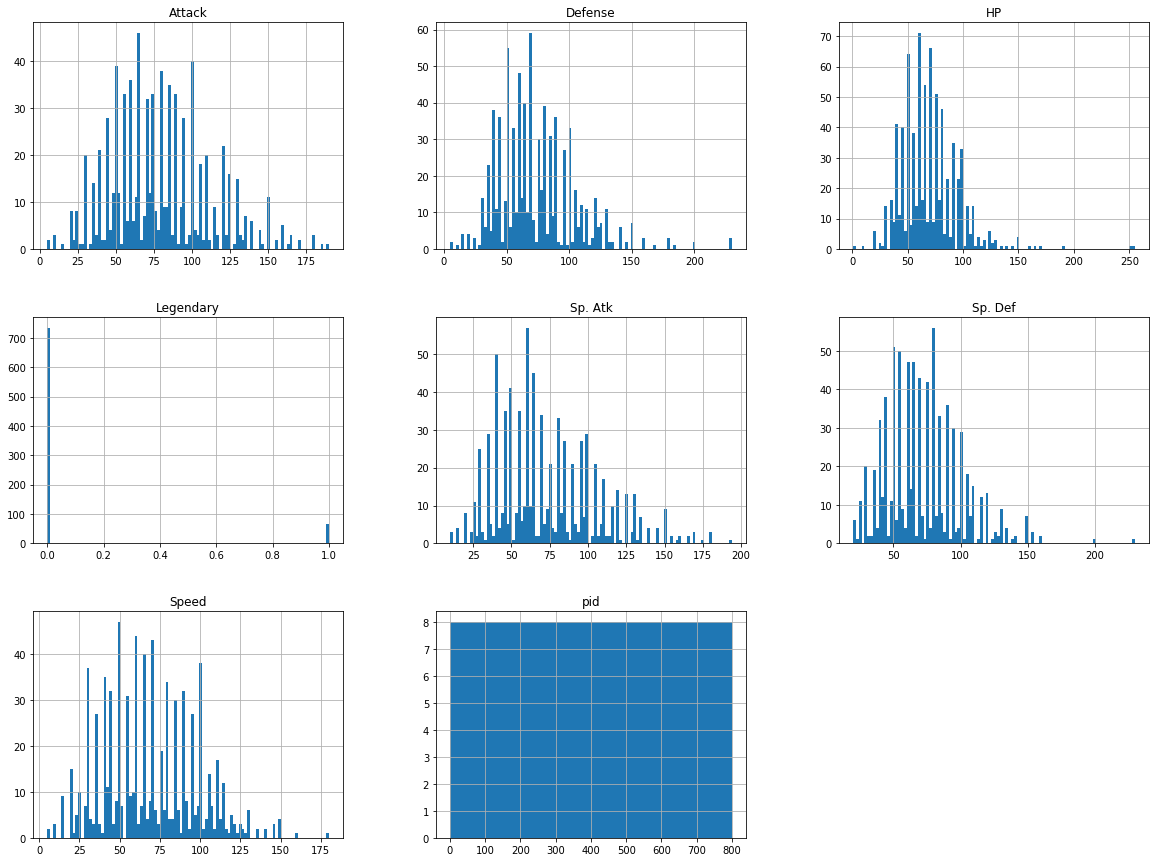

In [24]:
%matplotlib inline

def df_hist(dataframe,n_of_bins,figsize_tuple):
    dataframe.hist(bins= n_of_bins, figsize =figsize_tuple)
    plt.show()

df_hist(pkm,100,(20,15))

Zooming on 'Attack' and 'Defense' dimensionless distributions values.

Text(0.5, 1.0, 'Regular Defense')

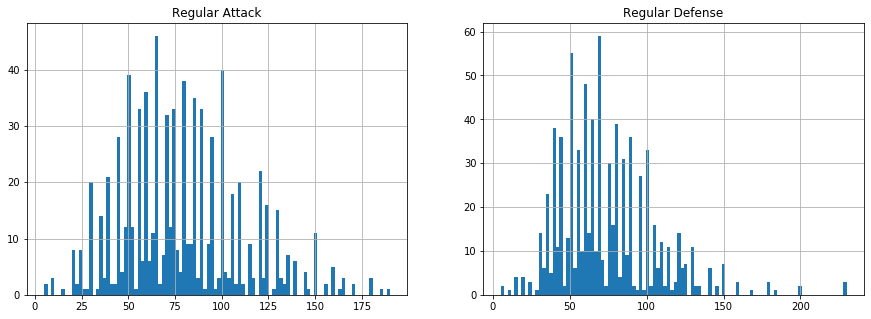

In [56]:
fig, axes = plt.subplots(1, 2)
pkm['Defense'].hist(figsize = (15,5),bins = 100,ax = axes[1])
pkm['Attack'].hist(figsize = (15,5), bins=100,ax=axes[0])
axes[0].set_title('Regular Attack')
axes[1].set_title('Regular Defense')

Plotting the (gaussian) probability distribution function of the two features.

Text(0.5, 1.0, 'Gaussian Distributions')

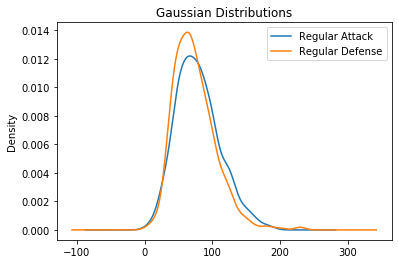

In [55]:
df = pd.DataFrame({'Regular Attack': pkm['Attack'], 'Regular Defense' : pkm['Defense']})
df.plot.kde().set_title('Gaussian Distributions')


From the table in the second cell we have for the two gaussians : $\mu \pm \sigma $ =  $\overline{x}_{Attack} \pm \sigma = 79.00 \pm 32.46 $ and $\mu \pm \sigma $ =  $\overline{x}_{Defense} \pm \sigma = 73.84 \pm 31.18 $. Their mean values are consistent .

Plotting directly the two features vectors of interest.

Text(0, 0.5, 'Defense')

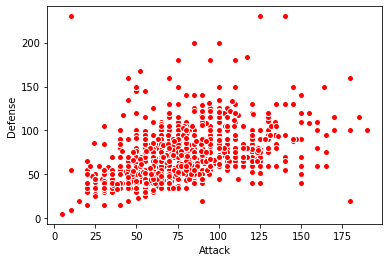

In [214]:
plt.scatter(pkm['Attack'].values,pkm['Defense'].values, color = "red",edgecolor ='white')
plt.xlabel('Attack')
plt.ylabel('Defense')

There isn't a precise relation between the two features: it seems linear low values,untill Attack <= 25, but after it goes far from linearity. We could expect this result : the pairwise correlation function calculated in the 1) is equal to 0.44 for Attack-Defense couple.

### 4-5) List the names of the 3 Pokémon with highest and lowest attack-over-defense ratio

Creating the features about the regular and special Attack-Defense ratio, so we can choose by which ration to sort the data.

In [4]:
ratio_a_d = pkm['Attack']/pkm['Defense']
ratio_sp_a_d = pkm['Sp. Atk']/pkm['Sp. Def']

pkm.insert(7,'Ratio A-D',ratio_a_d)
pkm.insert(10,'Ratio Sp. A-D',ratio_sp_a_d)

Creating a function to choose the criterion of sorting the pokémon dataset.

In [64]:
#pkm=pkm.drop(labels =['Ratio Sp. A-D','Ratio A-D'],axis = 1)
def choose_sort_criterion(p):
    return pkm.sort_values(by=[p],ascending = False)
    
choose_sort_criterion('Ratio A-D')

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,9.000000,180,20,9.000000,150,1
347,348,Carvanha,Water,Dark,45,90,20,4.500000,65,20,3.250000,65,0
19,20,Mega Beedrill,Bug,Poison,65,150,40,3.750000,15,80,0.187500,145,0
453,454,Cranidos,Rock,NaN,67,125,40,3.125000,30,30,1.000000,58,0
348,349,Sharpedo,Water,Dark,70,120,40,3.000000,95,40,2.375000,95,0
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,3.000000,150,50,3.000000,150,1
750,751,Aegislash Blade Forme,Steel,Ghost,60,150,50,3.000000,150,50,3.000000,60,0
454,455,Rampardos,Rock,NaN,97,165,60,2.750000,65,50,1.300000,58,0
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,2.666667,170,130,1.307692,80,1
186,187,Pichu,Electric,NaN,20,40,15,2.666667,35,35,1.000000,60,0


Creating the list of the three pokemon with highest and lowest attack-defense ratio.

In [65]:
l = list(enumerate(choose_sort_criterion('Ratio A-D')['Name']))
top_3 = [l[i][1] for i in range(3)]
worst_3 = [l[i][1] for i in range(len(l)-1,len(l)-4,-1)]
print('The three pokémon with the highest Attack-Defense ratio in the dataset are %s while the three pokémon with the lowest Attack-Defense ratio in the dataset are  %s' %(top_3,worst_3))


The three pokémon with the highest Attack-Defense ratio in the dataset are ['DeoxysAttack Forme', 'Carvanha', 'Mega Beedrill'] while the three pokémon with the lowest Attack-Defense ratio in the dataset are  ['Shuckle', 'Magikarp', 'Bronzor']


### 6)

Creating a dataset which contain the number of victories('Num_Vic') and the pid of every pokémon. After that, we do a left join between the é *pkm* dataset and this new dataset, to have the number of victories of every pokemon in the *pkm* dataset.

In [5]:
number_of_victories= battles['Winner'].value_counts()
number_of_victories['index'] = number_of_victories.index


In [6]:
d = {'Num_Vic': number_of_victories}
num = pd.DataFrame(data =d)
#num = num.drop(labels = 'index', axis = 1)
num['pid'] = num.index

In [95]:
num[num['pid']==12] #It is a check

,Num_Vic,pid


In [7]:
pkm_join=pkm.join(num.set_index('pid'), on='pid')
pkm_join.sort_values(by='Num_Vic',ascending = False)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic
162,163,Mewtwo,Psychic,NaN,106,110,90,1.222222,154,90,1.711111,130,1,152
153,154,Aerodactyl,Rock,Flying,80,105,65,1.615385,60,75,0.800000,130,0,136
437,438,Infernape,Fire,Fighting,76,104,71,1.464789,104,71,1.464789,108,0,136
427,428,Jirachi,Steel,Psychic,100,100,100,1.000000,100,100,1.000000,100,1,134
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,1.055556,95,90,1.055556,180,1,133
313,314,Slaking,Normal,NaN,150,160,100,1.600000,95,65,1.461538,100,0,133
213,214,Murkrow,Dark,Flying,60,85,42,2.023810,85,42,2.023810,91,0,130
393,394,Mega Absol,Dark,NaN,65,150,60,2.500000,115,60,1.916667,115,0,130
248,249,Mega Houndoom,Dark,Fire,75,90,90,1.000000,140,90,1.555556,115,0,128
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,1.588235,70,95,0.736842,150,0,127


We change the 'NaN' value with '0' value in *Num_Vic* feature.

In [8]:
pkm_join['Num_Vic'] = pkm_join['Num_Vic'].fillna(0)
pkm_join.sort_values(by='Num_Vic',ascending = False)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic
162,163,Mewtwo,Psychic,NaN,106,110,90,1.222222,154,90,1.711111,130,1,152
153,154,Aerodactyl,Rock,Flying,80,105,65,1.615385,60,75,0.800000,130,0,136
437,438,Infernape,Fire,Fighting,76,104,71,1.464789,104,71,1.464789,108,0,136
427,428,Jirachi,Steel,Psychic,100,100,100,1.000000,100,100,1.000000,100,1,134
313,314,Slaking,Normal,NaN,150,160,100,1.600000,95,65,1.461538,100,0,133
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,1.055556,95,90,1.055556,180,1,133
393,394,Mega Absol,Dark,NaN,65,150,60,2.500000,115,60,1.916667,115,0,130
213,214,Murkrow,Dark,Flying,60,85,42,2.023810,85,42,2.023810,91,0,130
248,249,Mega Houndoom,Dark,Fire,75,90,90,1.000000,140,90,1.555556,115,0,128
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,1.800000,180,100,1.800000,115,1,127


In [72]:
num[num['pid']==1] # It is a check

,Num_Vic,pid
1,37,1


Creating a list with the ten pokémon with the highest number of victories,ordered by decreasing.

In [71]:
l = list(enumerate(pkm_join.sort_values(by='Num_Vic',ascending = False)['Name']))
top_10 = [l[i][1] for i in range(10)]
top_10

['Mewtwo',
 'Aerodactyl',
 'Infernape',
 'Jirachi',
 'Slaking',
 'Deoxys Speed Forme',
 'Mega Absol',
 'Murkrow',
 'Mega Houndoom',
 'Mega Rayquaza']

### 7)  Grass Pokémon vs Rock Pokémon

Let's see how many pokemon there are in the dataset with classes : Grass-Rock and Rock-Grass. We don't have to include them in analysis.

In [17]:
pkm[(pkm['Class 1'] =='Grass') & (pkm['Class 2'] == 'Rock') ]


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary


In [18]:
pkm[(pkm['Class 1'] =='Rock') & (pkm['Class 2'] == 'Grass') ]


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,0.532468,61,87,0.701149,23,0
378,379,Cradily,Rock,Grass,86,81,97,0.835052,81,107,0.757009,43,0


In [126]:
pkm[((pkm['Class 1'] =='Grass') | (pkm['Class 2'] =='Grass')) & (pkm['Class 1'] != 'Rock')].describe()


,pid,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,428.956989,65.838710,73.731183,72.956989,1.063233,72.978495,70.956989,1.068178,61.311828,0.032258
std,242.327658,18.950904,24.179645,25.033419,0.352041,26.512089,20.517179,0.404568,27.334076,0.177642
min,1.000000,30.000000,27.000000,30.000000,0.450000,24.000000,30.000000,0.279070,10.000000,0.000000
25%,208.000000,50.000000,59.000000,55.000000,0.800000,54.000000,55.000000,0.800000,40.000000,0.000000
50%,459.000000,61.000000,70.000000,70.000000,0.987952,65.000000,70.000000,1.000000,56.000000,0.000000
75%,610.000000,75.000000,95.000000,85.000000,1.283582,90.000000,82.000000,1.222222,80.000000,0.000000
max,788.000000,123.000000,132.000000,131.000000,2.142857,145.000000,129.000000,2.500000,145.000000,1.000000


In [5]:
pkm[((pkm['Class 1'] =='Rock') | (pkm['Class 2'] =='Rock' )) & (pkm['Class 2'] != 'Grass') ].describe()

,pid,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,422.285714,65.660714,91.785714,107.803571,0.995240,60.017857,72.982143,0.911923,51.750000,0.071429
std,229.699781,22.086834,34.805284,38.823339,0.593164,27.100145,37.082459,0.346539,28.347358,0.259870
min,81.000000,20.000000,10.000000,40.000000,0.043478,10.000000,25.000000,0.043478,5.000000,0.000000
25%,236.250000,50.000000,63.000000,85.000000,0.661765,45.000000,45.000000,0.726739,31.500000,0.000000
50%,393.000000,68.500000,92.500000,105.000000,0.885621,55.000000,65.000000,0.939286,49.000000,0.000000
75%,621.500000,80.000000,116.250000,130.000000,1.161883,70.500000,86.500000,1.015873,62.750000,0.000000
max,797.000000,123.000000,165.000000,230.000000,3.125000,160.000000,230.000000,1.723077,150.000000,1.000000


The regular attack of grass pokemon is $\mu \pm \sigma $ =  $\overline{x}_{AttackGrass} \pm \sigma = 73.73 \pm 24.18 $ and $\mu \pm \sigma $ =  $\overline{x}_{AttackRock} \pm \sigma = 91.79 \pm 34.81 $. The two intervals have $\sim$ **59%** of probability to overlap their values, so they are consistent and it is useless to make a order relationship between them( so Attack Grass $\sim$ Attack Rock).

## Prediction 

## 1-2) Creation of the features

Creating a categorical (binary) features with the following values : 0 if the winner of the fight is the first pokemon or 1 if the the winner of the fight is the second pokemon.

In [98]:
w = battles['Winner'].values
fid = battles['First_pokemon'].values
bw = []
for i in range(len(w)):
    if(w[i] == fid[i]):
        bw.append(0)
    else :
        bw.append(1)

battles['Winner_numeric'] = bw
#battles = battles.drop(labels = ['pid'],axis = 1)


We want to create a dataset with the follwing features to make predictions: 
- 1) **Pid** of the first pokemon in the *battles* dataset
- 2) **Pid** of the second pokemon in the *battles* dataset
- 3) **(Binary)Winner** of the combat in the *battles* dataset
- 4) **Features** of the first pokemon (**Name,HP,Atk,Def etc.**)  in the pkm_join dataset
- 5) **Features** of the second pokemon (**Name,HP,Atk,Def etc.**)  in the pkm_join dataset

We are going to proceed in this way :
- 1-3-4: We do a left join between *battles* and *pkm_join* datasets with 'pid'(of the first pokemon) feature, creating an intermediate dataframe (tr)
- 2-5 : We do a left join between *tr* and *pkm_join* datasets with 'pid'(of the second pokemon) feature, creating a second intermediate dataframe (tr2)
- We sort  the *tr2* dataset to have the final dataset: *prediction_features*

In [109]:
battles['pid'] = battles['First_pokemon']
tr = battles.join(pkm_join.set_index('pid'), on = 'pid')


In [110]:
tr['pid'] = tr['Second_pokemon']

In [111]:
tr2=tr.join(pkm_join.set_index('pid'),rsuffix = '_second_pkm' ,on = 'pid')
tr2

,First_pokemon,Second_pokemon,Winner,Winner_numeric,pid,Name,Class 1,Class 2,HP,Attack,...,HP_second_pkm,Attack_second_pkm,Defense_second_pkm,Ratio A-D_second_pkm,Sp. Atk_second_pkm,Sp. Def_second_pkm,Ratio Sp. A-D_second_pkm,Speed_second_pkm,Legendary_second_pkm,Num_Vic_second_pkm
0,266,298,298,1,298,Larvitar,Rock,Ground,50,64,...,70,70,40,1.750000,60,40,1.500000,60,0,48
1,702,701,701,1,701,Virizion,Grass,Fighting,91,90,...,91,129,90,1.433333,72,90,0.800000,108,1,105
2,191,668,668,1,668,Togetic,Fairy,Flying,55,40,...,75,75,75,1.000000,125,95,1.315789,40,0,21
3,237,683,683,1,683,Slugma,Fire,NaN,40,40,...,77,120,90,1.333333,60,90,0.666667,48,0,39
4,151,231,151,0,231,Omastar,Rock,Water,70,60,...,20,10,230,0.043478,10,230,0.043478,5,0,0
5,657,752,657,0,752,Joltik,Bug,Electric,50,47,...,60,50,150,0.333333,50,150,0.333333,60,0,63
6,192,134,134,1,134,Natu,Psychic,Flying,40,50,...,65,50,35,1.428571,115,95,1.210526,95,0,99
7,73,545,545,1,545,Machop,Fighting,NaN,70,80,...,150,100,120,0.833333,100,120,0.833333,90,1,74
8,220,763,763,1,763,Pineco,Bug,NaN,50,65,...,50,53,62,0.854839,58,63,0.920635,44,0,17
9,302,31,31,1,31,Wingull,Water,Flying,40,30,...,35,55,40,1.375000,50,50,1.000000,90,0,93


In [112]:
tr2 = tr2.rename(columns={'First_pokemon': 'First_pkm_pid','Second_pokemon': 'Second_pkm_pid'})
tr2

,First_pkm_pid,Second_pkm_pid,Winner,Winner_numeric,pid,Name,Class 1,Class 2,HP,Attack,...,HP_second_pkm,Attack_second_pkm,Defense_second_pkm,Ratio A-D_second_pkm,Sp. Atk_second_pkm,Sp. Def_second_pkm,Ratio Sp. A-D_second_pkm,Speed_second_pkm,Legendary_second_pkm,Num_Vic_second_pkm
0,266,298,298,1,298,Larvitar,Rock,Ground,50,64,...,70,70,40,1.750000,60,40,1.500000,60,0,48
1,702,701,701,1,701,Virizion,Grass,Fighting,91,90,...,91,129,90,1.433333,72,90,0.800000,108,1,105
2,191,668,668,1,668,Togetic,Fairy,Flying,55,40,...,75,75,75,1.000000,125,95,1.315789,40,0,21
3,237,683,683,1,683,Slugma,Fire,NaN,40,40,...,77,120,90,1.333333,60,90,0.666667,48,0,39
4,151,231,151,0,231,Omastar,Rock,Water,70,60,...,20,10,230,0.043478,10,230,0.043478,5,0,0
5,657,752,657,0,752,Joltik,Bug,Electric,50,47,...,60,50,150,0.333333,50,150,0.333333,60,0,63
6,192,134,134,1,134,Natu,Psychic,Flying,40,50,...,65,50,35,1.428571,115,95,1.210526,95,0,99
7,73,545,545,1,545,Machop,Fighting,NaN,70,80,...,150,100,120,0.833333,100,120,0.833333,90,1,74
8,220,763,763,1,763,Pineco,Bug,NaN,50,65,...,50,53,62,0.854839,58,63,0.920635,44,0,17
9,302,31,31,1,31,Wingull,Water,Flying,40,30,...,35,55,40,1.375000,50,50,1.000000,90,0,93


In [113]:
tr2.sort_values(by='First_pkm_pid',ascending = True)

,First_pkm_pid,Second_pkm_pid,Winner,Winner_numeric,pid,Name,Class 1,Class 2,HP,Attack,...,HP_second_pkm,Attack_second_pkm,Defense_second_pkm,Ratio A-D_second_pkm,Sp. Atk_second_pkm,Sp. Def_second_pkm,Ratio Sp. A-D_second_pkm,Speed_second_pkm,Legendary_second_pkm,Num_Vic_second_pkm
15176,1,372,372,1,372,Bulbasaur,Grass,Poison,45,49,...,50,48,43,1.116279,46,41,1.121951,60,0,70
45814,1,462,462,1,462,Bulbasaur,Grass,Poison,45,49,...,70,94,50,1.880000,94,50,1.880000,66,0,65
17362,1,6,6,1,6,Bulbasaur,Grass,Poison,45,49,...,58,64,58,1.103448,80,65,1.230769,80,0,64
15251,1,649,649,1,649,Bulbasaur,Grass,Poison,45,49,...,55,75,60,1.250000,75,60,1.250000,103,0,91
4883,1,285,1,0,285,Bulbasaur,Grass,Poison,45,49,...,35,55,35,1.571429,30,30,1.000000,35,0,27
45783,1,572,572,1,572,Bulbasaur,Grass,Poison,45,49,...,75,98,63,1.555556,98,63,1.555556,101,0,106
37223,1,364,364,1,364,Bulbasaur,Grass,Poison,45,49,...,70,115,60,1.916667,115,60,1.916667,55,0,66
23794,1,249,249,1,249,Bulbasaur,Grass,Poison,45,49,...,75,90,90,1.000000,140,90,1.555556,115,0,128
426,1,679,679,1,679,Bulbasaur,Grass,Poison,45,49,...,80,70,40,1.750000,100,60,1.666667,145,0,118
41506,1,161,161,1,161,Bulbasaur,Grass,Poison,45,49,...,61,84,65,1.292308,70,70,1.000000,70,0,58


In [114]:
prediction_features = tr2.sort_values(by = 'First_pkm_pid', ascending = True).drop(labels = ['Winner','pid'],axis = 1).rename(columns = {'Winner_numeric': 'Winner'})

prediction_features

,First_pkm_pid,Second_pkm_pid,Winner,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,...,HP_second_pkm,Attack_second_pkm,Defense_second_pkm,Ratio A-D_second_pkm,Sp. Atk_second_pkm,Sp. Def_second_pkm,Ratio Sp. A-D_second_pkm,Speed_second_pkm,Legendary_second_pkm,Num_Vic_second_pkm
15176,1,372,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,50,48,43,1.116279,46,41,1.121951,60,0,70
45814,1,462,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,70,94,50,1.880000,94,50,1.880000,66,0,65
17362,1,6,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,58,64,58,1.103448,80,65,1.230769,80,0,64
15251,1,649,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,55,75,60,1.250000,75,60,1.250000,103,0,91
4883,1,285,0,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,35,55,35,1.571429,30,30,1.000000,35,0,27
45783,1,572,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,75,98,63,1.555556,98,63,1.555556,101,0,106
37223,1,364,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,70,115,60,1.916667,115,60,1.916667,55,0,66
23794,1,249,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,75,90,90,1.000000,140,90,1.555556,115,0,128
426,1,679,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,80,70,40,1.750000,100,60,1.666667,145,0,118
41506,1,161,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,...,61,84,65,1.292308,70,70,1.000000,70,0,58


In [105]:
prediction_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 15176 to 4812
Data columns (total 29 columns):
First_pkm_pid               50000 non-null int64
Second_pkm_pid              50000 non-null int64
Winner                      50000 non-null int64
Name                        50000 non-null object
Class 1                     50000 non-null object
Class 2                     25969 non-null object
HP                          50000 non-null int64
Attack                      50000 non-null int64
Defense                     50000 non-null int64
Ratio A-D                   50000 non-null float64
Sp. Atk                     50000 non-null int64
Sp. Def                     50000 non-null int64
Ratio Sp. A-D               50000 non-null float64
Speed                       50000 non-null int64
Legendary                   50000 non-null int64
Num_Vic                     50000 non-null int64
Name_second_pkm             50000 non-null object
Class 1_second_pkm          50000 non-null obje

To handle categorical features,as Pokémon Classes, we do an **one hot encoding**. In this way we have a column for every pokémon class with two possible values: {0,1} and we don't lose information for the prediction task, at the cost to increase the number of the features of the dataset.

In [115]:
prediction_features = pd.get_dummies(prediction_features,columns = ['Class 1','Class 2','Class 1_second_pkm','Class 2_second_pkm'])


In [116]:
prediction_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 15176 to 4812
Data columns (total 97 columns):
First_pkm_pid                  50000 non-null int64
Second_pkm_pid                 50000 non-null int64
Winner                         50000 non-null int64
Name                           50000 non-null object
HP                             50000 non-null int64
Attack                         50000 non-null int64
Defense                        50000 non-null int64
Ratio A-D                      50000 non-null float64
Sp. Atk                        50000 non-null int64
Sp. Def                        50000 non-null int64
Ratio Sp. A-D                  50000 non-null float64
Speed                          50000 non-null int64
Legendary                      50000 non-null int64
Num_Vic                        50000 non-null int64
Name_second_pkm                50000 non-null object
HP_second_pkm                  50000 non-null int64
Attack_second_pkm              50000 non-null int6

 ## 3)

Let's make and train the model.

In [121]:
from sklearn.ensemble import RandomForestRegressor

X = prediction_features.drop(labels = ['Winner','Name','Name_second_pkm'],axis = 1)
Y = prediction_features['Winner']
n_estimators = [10,25,50,100]
max_depth = [2,4,10]
accuracy_test_vector = []
accuracy_train_vector = []
n_estimator_simulation = []
max_depth_simulation = []

def split_train_test(data1,data2,ratio):
    shuffled_indices = np.random.permutation(len(data1))
    train_set_size = int(len(data1)*ratio)
    train_indices = shuffled_indices[:train_set_size]
    test_indices =  shuffled_indices[train_set_size:]
    X_train_set = data1.iloc[train_indices]
    Y_train_set = data2.iloc[train_indices]
    X_test_set = data1.iloc[test_indices]
    Y_test_set = data2.iloc[test_indices]
    return X_train_set,X_test_set,Y_train_set,Y_test_set



for i in n_estimators :
    for j in max_depth :
        X_train,X_test,Y_train,Y_test = split_train_test(X,Y,0.9)
       
        rfr = RandomForestRegressor(n_estimators = i ,max_depth = j,random_state = 42)
        rfr.fit(X_train,Y_train)
    
        Y_predict_train = rfr.predict(X_train)
        Y_predict_test = rfr.predict(X_test)
        

        
        accuracy_test= rfr.score(X_test,Y_test)
        accuracy_train= rfr.score(X_train,Y_train)
        

        accuracy_test_vector.append(accuracy_test)
        accuracy_train_vector.append(accuracy_train)
        n_estimator_simulation.append(i)
        max_depth_simulation.append(j)
        



In [122]:
length = len(accuracy_train_vector)
hyp_and_results = []
for  k in range(length):
    hyp_and_results.append((round(n_estimator_simulation[k],3),round(max_depth_simulation[k],3), round(accuracy_train_vector[k],3), round(accuracy_test_vector[k],3)))
print(hyp_and_results)  

[(10, 2, 0.476, 0.465), (10, 4, 0.67, 0.67), (10, 10, 0.888, 0.853), (25, 2, 0.475, 0.481), (25, 4, 0.672, 0.676), (25, 10, 0.894, 0.846), (50, 2, 0.481, 0.472), (50, 4, 0.673, 0.682), (50, 10, 0.897, 0.841), (100, 2, 0.482, 0.461), (100, 4, 0.667, 0.669), (100, 10, 0.897, 0.844)]


The best set of hyperparameters are [n_trees = 100,max_depth = 10]. We have divided,however, the dataset at every training of the model randomly(the definition of **split_train_test** function),in this way the model could  have seen even elements of the test set during the training! To avoid this problem, and to have the same elements in the test and train sets for every iteration,let's introduce a random seed in the split_train_test function.

In [123]:
accuracy_test_vector_correct = []
accuracy_train_vector_correct = []
n_estimator_simulation_correct = []
max_depth_simulation_correct = []

def split_train_test(data,ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    train_set_size = int(len(data)*ratio)
    train_indices = shuffled_indices[:train_set_size]
    test_indices =  shuffled_indices[train_set_size:]
    train_test = data.iloc[train_indices]
    test_set = data.iloc[test_indices]
    return train_test,test_set



for i in n_estimators :
    for j in max_depth :
        X_train,X_test = split_train_test(X,0.9)
        Y_train,Y_test = split_train_test(Y,0.9)
        rfr = RandomForestRegressor(n_estimators = i ,max_depth = j,random_state = 42)
        rfr.fit(X_train,Y_train)
    
        Y_predict_train_correct = rfr.predict(X_train)
        Y_predict_test_correct = rfr.predict(X_test)
        

        
        accuracy_test= rfr.score(X_test,Y_test)
        accuracy_train= rfr.score(X_train,Y_train)
        

        accuracy_test_vector_correct.append(accuracy_test)
        accuracy_train_vector_correct.append(accuracy_train)
        n_estimator_simulation_correct.append(i)
        max_depth_simulation_correct.append(j)


In [124]:
length = len(accuracy_train_vector_correct)
hyp_and_results_correct = []
for  k in range(length):
    hyp_and_results_correct.append((round(n_estimator_simulation_correct[k],3),round(max_depth_simulation_correct[k],3), round(accuracy_train_vector_correct[k],3), round(accuracy_test_vector_correct[k],3)))
print(hyp_and_results_correct)  


[(10, 2, 0.484, 0.479), (10, 4, 0.678, 0.677), (10, 10, 0.89, 0.851), (25, 2, 0.479, 0.476), (25, 4, 0.675, 0.672), (25, 10, 0.894, 0.856), (50, 2, 0.481, 0.477), (50, 4, 0.675, 0.673), (50, 10, 0.895, 0.858), (100, 2, 0.479, 0.475), (100, 4, 0.673, 0.671), (100, 10, 0.895, 0.857)]


With the previous correction,the best set of hyperparameters are [n_trees = 50,max_depth = 10] but we can consider [n_trees = 100,max_depth = 10],even if it isn't so handy:it has the double of the number of trees! PS: The accuracy on test set is increased in both the configurations.

## 7)

Let's make a feature importance for the features that we've used in the prediction task.

In [125]:
importances = rfr.feature_importances_
dictio_features = {}
for i in range(X.shape[1]):
    dictio_features[i] = importances[i]
    
dictio_features

{0: 0.0027500555457128316,
 1: 0.002744712761738934,
 2: 0.004253172536175643,
 3: 0.013071248180201504,
 4: 0.00261045788463361,
 5: 0.0018506521549109805,
 6: 0.001969645497772747,
 7: 0.00152517718396136,
 8: 0.0023748080443664163,
 9: 0.22257799975793016,
 10: 0.00010646982269186996,
 11: 0.23440392439993024,
 12: 0.003226554020327241,
 13: 0.01382503612588228,
 14: 0.0027399384155804645,
 15: 0.002026994810826718,
 16: 0.001837405741396065,
 17: 0.0018310834635428116,
 18: 0.0020863804334803524,
 19: 0.33166501256382397,
 20: 6.295698741452269e-05,
 21: 0.1077012354329525,
 22: 0.00018884378993128253,
 23: 0.0004819439075298665,
 24: 0.0002217800789757509,
 25: 0.0005503968288313968,
 26: 0.00016460391932844427,
 27: 0.0008882723114076147,
 28: 0.0001677369810840462,
 29: 1.6403996861838507e-05,
 30: 0.0006808766851172238,
 31: 0.00023363985432835218,
 32: 0.0006739172966541617,
 33: 9.667745248260478e-05,
 34: 0.005002456943694429,
 35: 0.0004258261248683824,
 36: 0.0008059386493

In [126]:
u = [i for i in X.columns]
dictio_features_named = dict(zip(u, list(dictio_features.values())))
    
dictio_features_named

{'First_pkm_pid': 0.0027500555457128316,
 'Second_pkm_pid': 0.002744712761738934,
 'HP': 0.004253172536175643,
 'Attack': 0.013071248180201504,
 'Defense': 0.00261045788463361,
 'Ratio A-D': 0.0018506521549109805,
 'Sp. Atk': 0.001969645497772747,
 'Sp. Def': 0.00152517718396136,
 'Ratio Sp. A-D': 0.0023748080443664163,
 'Speed': 0.22257799975793016,
 'Legendary': 0.00010646982269186996,
 'Num_Vic': 0.23440392439993024,
 'HP_second_pkm': 0.003226554020327241,
 'Attack_second_pkm': 0.01382503612588228,
 'Defense_second_pkm': 0.0027399384155804645,
 'Ratio A-D_second_pkm': 0.002026994810826718,
 'Sp. Atk_second_pkm': 0.001837405741396065,
 'Sp. Def_second_pkm': 0.0018310834635428116,
 'Ratio Sp. A-D_second_pkm': 0.0020863804334803524,
 'Speed_second_pkm': 0.33166501256382397,
 'Legendary_second_pkm': 6.295698741452269e-05,
 'Num_Vic_second_pkm': 0.1077012354329525,
 'Class 1_Bug': 0.00018884378993128253,
 'Class 1_Dark': 0.0004819439075298665,
 'Class 1_Dragon': 0.0002217800789757509,
 '

In [127]:
dictio_importance_named = {k: v for k, v in sorted(dictio_features_named.items(), key= lambda item : item[1],reverse = True)}
dictio_importance = {k: v for k, v in sorted(dictio_features.items(), key= lambda item : item[1],reverse = True)}

dictio_importance_named

{'Speed_second_pkm': 0.33166501256382397,
 'Num_Vic': 0.23440392439993024,
 'Speed': 0.22257799975793016,
 'Num_Vic_second_pkm': 0.1077012354329525,
 'Attack_second_pkm': 0.01382503612588228,
 'Attack': 0.013071248180201504,
 'Class 2_second_pkm_Ghost': 0.007957358196388929,
 'Class 1_Normal': 0.005002456943694429,
 'Class 2_Ghost': 0.004781943321968078,
 'HP': 0.004253172536175643,
 'HP_second_pkm': 0.003226554020327241,
 'First_pkm_pid': 0.0027500555457128316,
 'Second_pkm_pid': 0.002744712761738934,
 'Defense_second_pkm': 0.0027399384155804645,
 'Class 2_Flying': 0.0027242318993002134,
 'Defense': 0.00261045788463361,
 'Ratio Sp. A-D': 0.0023748080443664163,
 'Ratio Sp. A-D_second_pkm': 0.0020863804334803524,
 'Ratio A-D_second_pkm': 0.002026994810826718,
 'Sp. Atk': 0.001969645497772747,
 'Class 1_second_pkm_Electric': 0.0018747035715143186,
 'Ratio A-D': 0.0018506521549109805,
 'Sp. Atk_second_pkm': 0.001837405741396065,
 'Sp. Def_second_pkm': 0.0018310834635428116,
 'Class 1_seco

The first ten features are:['Speed_second_pkm': 0.3317, 'Num_Vic': 0.2344, 'Speed':0.2226, 'Num_Vic_second_pkm': 0.1077, 'Attack_second_pkm': 0.0138,'Attack': 0.0131, 'Class 2_second_pkm_Ghost': 0.0080, 'Class 1_Normal': 0.0050,'Class 2_Ghost': 0.0048,'HP': 0.0043] We can note that the $\sim$ 90% of the information is in the first four features: Speed_second_pkm, Num_Vic, Speed, Num_Vic_second_pkm. The *speed* and the *number of victory* seem to be the most important predictive features.

([<matplotlib.axis.YTick at 0x2a8c1639358>,
 <a list of 11 Text yticklabel objects>)

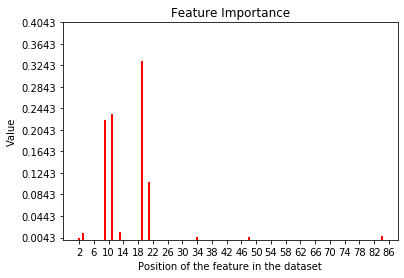

In [129]:
import matplotlib.pyplot as plt
a = list(dictio_importance.keys())
b = list(dictio_importance.values())

k1 = a[:10]
v1 = b[:10]

plt.figure()
plt.title('Feature Importance')
plt.xlabel('Position of the feature in the dataset')
plt.ylabel('Value')
plt.bar(k1,v1, color="r",width = 0.5,align= 'center')
plt.xticks(np.arange(min(k1), max(k1)+5, 4))
plt.yticks(np.arange(min(v1), max(v1)+0.1, 0.04))

## 3) Ranking

### Computing the winning ratio

Let's create a dataframe with the sum of the battles for every pokemon('pid').

In [9]:
number_of_battles1 = battles['First_pokemon'].value_counts()
number_of_battles2 = battles['Second_pokemon'].value_counts()

number_of_battles1['index'] = number_of_battles1.index
number_of_battles2['index'] = number_of_battles1.index



In [10]:
d1 = {'Num_bat1': number_of_battles1}
d2 = {'Num_bat2': number_of_battles2}
num1 = pd.DataFrame(data =d1)
num2 = pd.DataFrame(data =d2)

num1['pid'] = num1.index
num2['pid'] = num2.index

num1 =  num1.drop(labels = 'index', axis = 0)
num2 =  num2.drop(labels = 'index', axis = 0)

In [11]:
num1 = num1.sort_values(by = 'pid',ascending = 'True')
num2 = num2.sort_values(by = 'pid',ascending = 'True')

number_of_battles_tot = num1['Num_bat1'] + num2['Num_bat2']
number_of_battles_tot['pid'] = number_of_battles_tot.index

dt={'Num_bat': number_of_battles_tot}

num3 = pd.DataFrame(data = dt)
num3['pid'] = num3.index
num3 = num3.drop(labels ='pid',axis = 0)
num3

,Num_bat,pid
1,133,1
2,121,2
3,132,3
4,125,4
5,112,5
6,118,6
7,133,7
8,139,8
9,135,9
10,117,10


Let's make a left join between the previous dataframe and the dataframe 'num' which contains the number of victories for every pokemon('pid'). After we make a left join between the pkm_join dataframe and the resulting dataframe of the previous left join operation. 

In [12]:
num4 = num3.join(num.set_index('pid'),on = 'pid')
num4['Win_percentage'] = (num4['Num_Vic']/num4['Num_bat'])*100
num4.sort_values(by = 'Win_percentage',ascending = False)
pkm_join = pkm_join.join(num4.set_index('pid'),lsuffix = '_join',rsuffix ='_num4' ,on = 'pid').drop(labels = 'Num_Vic_num4',axis = 1)

In [13]:
pkm_join = pkm_join.rename(columns = {'Num_Vic_join':'Num_Vic'})
pkm_join

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,65,65,1.000000,45,0,37,133,27.8195
1,2,Ivysaur,Grass,Poison,60,62,63,0.984127,80,80,1.000000,60,0,46,121,38.0165
2,3,Venusaur,Grass,Poison,80,82,83,0.987952,100,100,1.000000,80,0,89,132,67.4242
3,4,Mega Venusaur,Grass,Poison,80,100,123,0.813008,122,120,1.016667,80,0,70,125,56
4,5,Charmander,Fire,NaN,39,52,43,1.209302,60,50,1.200000,65,0,55,112,49.1071
5,6,Charmeleon,Fire,NaN,58,64,58,1.103448,80,65,1.230769,80,0,64,118,54.2373
6,7,Charizard,Fire,Flying,78,84,78,1.076923,109,85,1.282353,100,0,115,133,86.4662
7,8,Mega Charizard X,Fire,Dragon,78,130,111,1.171171,130,85,1.529412,100,0,119,139,85.6115
8,9,Mega Charizard Y,Fire,Flying,78,104,78,1.333333,159,115,1.382609,100,0,114,135,84.4444
9,10,Squirtle,Water,NaN,44,48,65,0.738462,50,64,0.781250,43,0,19,117,16.2393


In [14]:
pkm_join_sorted_wp = pkm_join.sort_values(by = 'Win_percentage',ascending = False)
pkm_join_sorted_wp

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,1.588235,70,95,0.736842,150,0,127,129,98.4496
512,513,Weavile,Dark,Ice,70,120,65,1.846154,45,85,0.529412,125,0,116,119,97.479
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,1.250000,110,90,1.222222,121,1,121,125,96.8
19,20,Mega Beedrill,Bug,Poison,65,150,40,3.750000,15,80,0.187500,145,0,115,119,96.6387
153,154,Aerodactyl,Rock,Flying,80,105,65,1.615385,60,75,0.800000,130,0,136,141,96.4539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,1.446809,54,96,0.562500,135,0,124,129,96.124
726,727,Greninja,Water,Dark,72,95,67,1.417910,103,71,1.450704,122,0,122,127,96.063
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,1.422222,77,77,1.000000,128,0,118,123,95.935
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,2.142857,194,120,1.616667,140,1,119,125,95.2
349,350,Mega Sharpedo,Water,Dark,70,140,70,2.000000,110,65,1.692308,105,0,114,120,95


Let's fill the 'Nan' values in the features 'Win_percentage' and 'Num_bat' with '0'.  

In [15]:
pkm_join['Win_percentage'] = pkm_join['Win_percentage'].fillna(0)
pkm_join['Num_bat'] = pkm_join['Num_bat'].fillna(0)
pkm_join

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,65,65,1.000000,45,0,37,133,27.819549
1,2,Ivysaur,Grass,Poison,60,62,63,0.984127,80,80,1.000000,60,0,46,121,38.016529
2,3,Venusaur,Grass,Poison,80,82,83,0.987952,100,100,1.000000,80,0,89,132,67.424242
3,4,Mega Venusaur,Grass,Poison,80,100,123,0.813008,122,120,1.016667,80,0,70,125,56.000000
4,5,Charmander,Fire,NaN,39,52,43,1.209302,60,50,1.200000,65,0,55,112,49.107143
5,6,Charmeleon,Fire,NaN,58,64,58,1.103448,80,65,1.230769,80,0,64,118,54.237288
6,7,Charizard,Fire,Flying,78,84,78,1.076923,109,85,1.282353,100,0,115,133,86.466165
7,8,Mega Charizard X,Fire,Dragon,78,130,111,1.171171,130,85,1.529412,100,0,119,139,85.611511
8,9,Mega Charizard Y,Fire,Flying,78,104,78,1.333333,159,115,1.382609,100,0,114,135,84.444444
9,10,Squirtle,Water,NaN,44,48,65,0.738462,50,64,0.781250,43,0,19,117,16.239316


In [16]:
top_ten_b_w_ratio = pkm_join_sorted_wp[:10]
top_ten_b_w_ratio 

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,1.588235,70,95,0.736842,150,0,127,129,98.4496
512,513,Weavile,Dark,Ice,70,120,65,1.846154,45,85,0.529412,125,0,116,119,97.479
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,1.250000,110,90,1.222222,121,1,121,125,96.8
19,20,Mega Beedrill,Bug,Poison,65,150,40,3.750000,15,80,0.187500,145,0,115,119,96.6387
153,154,Aerodactyl,Rock,Flying,80,105,65,1.615385,60,75,0.800000,130,0,136,141,96.4539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,1.446809,54,96,0.562500,135,0,124,129,96.124
726,727,Greninja,Water,Dark,72,95,67,1.417910,103,71,1.450704,122,0,122,127,96.063
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,1.422222,77,77,1.000000,128,0,118,123,95.935
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,2.142857,194,120,1.616667,140,1,119,125,95.2
349,350,Mega Sharpedo,Water,Dark,70,140,70,2.000000,110,65,1.692308,105,0,114,120,95


We remember the results of the feature importance of the prediction task : the $\sim$ 90% of the information is in the *Speed*(first and second pokemon of the battle) and in the *Number of Victories*(first and second pokemon in the battle). We can note that the first ten pokemon for win percentage have high values for the number of victories(Num_Vic > 110 units) and high values for the speed( Speed>=105 units), so the ranking with win percentage is in accordance with the results of the feature importance.

### 3.1)

Let's create the G matrix for the dominance graph. First of all we make a list with the elements $g_{ij} \neq 0$ that are present in the battles dataset. After we put them in a matrix with only zero elements.

In [68]:
battles.sort_values(by =['First_pokemon','Second_pokemon'])
a = battles['First_pokemon'].copy()-1
c = battles['Second_pokemon'].copy()-1
f = battles['Winner'].copy()-1
t= []

for i in range(len(a)):
    if(a[i] == f[i]):
        f[i]=1
        t.append([a[i],c[i],f[i]])
    elif(c[i] == f[i]):
        f[i]=1
        t.append([c[i],a[i],f[i]])

t.sort()



We have to ignore the first column and the first row,both with 0 index, because they don't represent any pokemon score.

In [69]:
g = np.zeros((800,800))
for i in range(len(t)):
    g[(t[i][0])][(t[i][1])]=t[i][2]

We calculate $G$ and $G^{2}$ as numpy matrix.

In [70]:
g1= np.matrix(g)
g2= np.matmul(g1,g1)


We calculate A.

In [71]:
A = g1+g2
A

matrix([[1., 0., 0., ..., 1., 0., 1.],
        [2., 0., 0., ..., 1., 0., 0.],
        [9., 4., 1., ..., 5., 2., 0.],
        ...,
        [7., 3., 2., ..., 3., 1., 1.],
        [8., 5., 0., ..., 6., 0., 1.],
        [7., 4., 0., ..., 3., 0., 0.]])

### 3.2)

Let's calculate the dominance score for every pokemon and put it in the pkm_join dataset.

In [72]:
summ = np.sum(A,axis = 1)

In [73]:
dominance_score=list(enumerate(summ))
dominance_score.sort(reverse = True,key=lambda el : el[1])

In [74]:
for i in range(len(dominance_score)):
    dominance_score[i]=list(dominance_score[i])
    dominance_score[i][1]=int(dominance_score[i][1])
dominance_score[:10]

[[162, 8227],
 [431, 7920],
 [153, 7568],
 [146, 7365],
 [426, 7099],
 [429, 7049],
 [248, 7042],
 [154, 7020],
 [393, 6970],
 [163, 6957]]

Let's insert the dominance score as column in pkm_join dataframe.with the correct 'pid': 'pid'+1.

In [75]:
w=[]
v = []
for i in range(len(dominance_score)):
    w.append(dominance_score[i][0]+1)
    v.append(dominance_score[i][1])
w1 = {'pid':w}
ds = pd.DataFrame(data=w1)
ds.insert(1, 'Dominance_score',v)
ds

,pid,Dominance_score
0,163,8227
1,432,7920
2,154,7568
3,147,7365
4,427,7099
5,430,7049
6,249,7042
7,155,7020
8,394,6970
9,164,6957


In [76]:
pkm_join_ds= pkm_join.join(ds.set_index('pid'),lsuffix = '_join',rsuffix ='_ds' ,on = 'pid')
pkm_join_ds

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage,Dominance_score
0,1,Bulbasaur,Grass,Poison,45,49,49,1.000000,65,65,1.000000,45,0,37,133,27.819549,827
1,2,Ivysaur,Grass,Poison,60,62,63,0.984127,80,80,1.000000,60,0,46,121,38.016529,1243
2,3,Venusaur,Grass,Poison,80,82,83,0.987952,100,100,1.000000,80,0,89,132,67.424242,3355
3,4,Mega Venusaur,Grass,Poison,80,100,123,0.813008,122,120,1.016667,80,0,70,125,56.000000,2847
4,5,Charmander,Fire,NaN,39,52,43,1.209302,60,50,1.200000,65,0,55,112,49.107143,1626
5,6,Charmeleon,Fire,NaN,58,64,58,1.103448,80,65,1.230769,80,0,64,118,54.237288,2432
6,7,Charizard,Fire,Flying,78,84,78,1.076923,109,85,1.282353,100,0,115,133,86.466165,5679
7,8,Mega Charizard X,Fire,Dragon,78,130,111,1.171171,130,85,1.529412,100,0,119,139,85.611511,6030
8,9,Mega Charizard Y,Fire,Flying,78,104,78,1.333333,159,115,1.382609,100,0,114,135,84.444444,5855
9,10,Squirtle,Water,NaN,44,48,65,0.738462,50,64,0.781250,43,0,19,117,16.239316,439


In [77]:
pkm_join_sorted_ds = pkm_join_ds.sort_values(by='Dominance_score',ascending = False)
top_ten_dominance_score = pkm_join_sorted_ds[:10]
top_ten_dominance_score

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Ratio A-D,Sp. Atk,Sp. Def,Ratio Sp. A-D,Speed,Legendary,Num_Vic,Num_bat,Win_percentage,Dominance_score
162,163,Mewtwo,Psychic,NaN,106,110,90,1.222222,154,90,1.711111,130,1,152,164,92.682927,8227
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,1.055556,95,90,1.055556,180,1,133,145,91.724138,7920
153,154,Aerodactyl,Rock,Flying,80,105,65,1.615385,60,75,0.800000,130,0,136,141,96.453901,7568
146,147,Jolteon,Electric,NaN,65,65,60,1.083333,110,95,1.157895,130,0,124,134,92.537313,7365
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,1.800000,180,100,1.800000,115,1,127,134,94.776119,7099
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,9.000000,180,20,9.000000,150,1,121,134,90.298507,7049
248,249,Mega Houndoom,Dark,Fire,75,90,90,1.000000,140,90,1.555556,115,0,128,135,94.814815,7042
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,1.588235,70,95,0.736842,150,0,127,129,98.449612,7020
393,394,Mega Absol,Dark,NaN,65,150,60,2.500000,115,60,1.916667,115,0,130,139,93.525180,6970
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,1.900000,154,100,1.540000,130,1,125,135,92.592593,6957


### 3-3;3-4)

We can note that the win ratio ranking and the dominance score don't give the same results: the intersection between the results of the two analysis is given by "Aerodactyl" and "Mega Areodactyl" records,however not in the same positions. Both the two metrics are in accordance with the results of the prediction task,with mean values of the Speed and Num_vic slightly higher for the pokemon classified by dominance score ($\overline{Speed_{win}}=130$;$\overline{Speed}_{dominance}=135$,$\overline{Num vic}_{win}=121$;$\overline{Num vic}_{dominance}=130$). The difference between the two metrics is in the definition of the dominance matrix A: the sum between adjacency metrix $G$ and $G^{2}$ or second step relationship(dominance) of adjacency matrix. We can find a stronger order relation for the vertices(pokemon)directly connected or not  in the whole graph(battles that are won,lose or not present) than the simple win ratio ranking: the win ratio depends(it is normalized) on the number of battles fought by every pokemon,it's not equal for everyone, while the dominance matrix  doesn't have this normalization problem because it sum the values the whole possible 'dominations'(combats results) values for every vertex until the second step relationship. For example 'Mewtwo' has won more battles than 'Aerodactyl' but the first pokemon has fought more battle than the second, so its win ratio is lower. The dominance score is more accurate method to use in the Pokedex!